# Praktikum AI Modul 3
#### Dataset = https://www.kaggle.com/competitions/praktikum-ai-modul-3/data

#### Description : 
Tahun 2070, perjalanan antar kota menggunakan kapal pesiar mewah Arjuna telah menjadi tren di kalangan masyarakat dunia. Setiap penumpang dengan ID unik berlayar dalam kelompok, berasal dari berbagai kota, dan memiliki pilihan untuk memanfaatkan fitur Sleeper Plus yang memungkinkan mereka tidur sepanjang perjalanan. Kapal pesiar ini dilengkapi dengan berbagai fasilitas mewah seperti spa, bioskop, dan layanan kamar tambahan. Sejumlah penumpang memilih untuk menikmati layanan VIP, memberikan pengalaman perjalanan yang lebih eksklusif. Di akhir perjalanan, sistem mencatat apakah penumpang telah tiba dengan selamat di kota tujuan mereka.

Kapal pesiar Arjuna baru saja mengalami sebuah insiden di tengah laut. Meskipun kapal berhasil tiba di tujuan, ada beberapa penumpang yang tidak. Manajemen Arjuna ingin memahami faktor-faktor yang mempengaruhi peluang seseorang untuk selamat dari insiden tersebut.

#### Praktikan :
1. Fathika Afrine Azaruddin - 5027211016

## Description of Data

- Penumpang_id :
Id unik untuk setiap penumpang. Setiap Id berbentuk gggg_pp di mana gggg menunjukkan kelompok yang bepergian dengan penumpang dan pp adalah nomor mereka dalam kelompok tersebut.
- Asal: 
Kota dimana penumpang berangkat.
- Sleeper_Plus: 
Menunjukkan apakah penumpang memilih fitur Sleeper Plus.
- Kabin: 
Nomor kabin tempat penumpang menginap. Berupa dek/nomor/sisi.
- Tujuan: 
Kota tujuan penumpang.
- Umur: 
Usia dari penumpang.
- VIP: 
Apakah penumpang memilih untuk layanan VIP selama perjalanan.
- Servis_Kamar_Tambahan, Belanja_Makanan, Belanja_Merchandise, Spa, Bioskop:
Jumlah yang ditagihkan kepada penumpang atas setiap fasilitas tambahan (dalam dolar).
- Nama:
Nama dari penumpang.
- Tiba_Ditujuan:
Apakah penumpang telah telah tiba di tujuan. (kolom target)

### 1. Reviewing Data

In [1]:
import pandas as pd
import numpy as np
import os
import math
import warnings
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
warnings.filterwarnings('ignore')

In [2]:
# Membaca dataset train.csv
df_train = pd.read_csv('../Modul 3/train.csv')
df_test = pd.read_csv('../Modul 3/test.csv')

In [3]:
# Melihat overall data untuk train.csv
df_train

,Penumpang_id,Asal,Sleeper_Plus,Kabin,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Nama,Tiba_Ditujuan
0,0001_01,Jakarta,False,B/0/P,Bali,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Lampung,False,F/0/S,Bali,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Jakarta,False,A/0/S,Bali,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Jakarta,False,A/0/S,Bali,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Lampung,False,F/1/S,Bali,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,7376_01,Jakarta,True,E/477/P,Bali,26.0,False,0.0,0.0,0.0,0.0,0.0,Neutrin Mirinanty,True
6950,7377_01,Lampung,True,G/1186/P,Aceh,43.0,False,0.0,0.0,0.0,0.0,0.0,Estine Steelerettt,False
6951,7379_01,Lampung,False,F/1416/S,Bali,20.0,False,9.0,0.0,1540.0,0.0,0.0,Annard Bryants,False
6952,7385_01,Lampung,False,F/1417/S,Aceh,19.0,False,40.0,0.0,77.0,572.0,0.0,Coracy Reyerson,False


In [4]:
df_train.describe()

,Umur,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop
count,6800.000000,6804.000000,6801.000000,6786.000000,6808.000000,6792.000000
mean,28.883676,225.257055,458.740038,174.220749,312.969741,302.348793
std,14.570737,662.105367,1634.970406,550.497694,1152.953321,1139.927062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,48.000000,76.000000,27.000000,58.000000,44.000000
max,79.000000,14327.000000,29813.000000,12253.000000,22408.000000,24133.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6954 entries, 0 to 6953
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Penumpang_id           6954 non-null   object 
 1   Asal                   6793 non-null   object 
 2   Sleeper_Plus           6783 non-null   object 
 3   Kabin                  6792 non-null   object 
 4   Tujuan                 6804 non-null   object 
 5   Umur                   6800 non-null   float64
 6   VIP                    6796 non-null   object 
 7   Servis_Kamar_Tambahan  6804 non-null   float64
 8   Belanja_Makanan        6801 non-null   float64
 9   Belanja_Merchandise    6786 non-null   float64
 10  Spa                    6808 non-null   float64
 11  Bioskop                6792 non-null   float64
 12  Nama                   6789 non-null   object 
 13  Tiba_Ditujuan          6954 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 713.2+ K

In [6]:
df_train[['Asal', 'Tiba_Ditujuan']].groupby(['Asal'], as_index = False).mean().sort_values(by = 'Tiba_Ditujuan', ascending = False)

,Asal,Tiba_Ditujuan
1,Jakarta,0.658422
0,Banten,0.519972
2,Lampung,0.436750


In [7]:
df_train[['Tujuan', 'Tiba_Ditujuan']].groupby(['Tujuan'], as_index = False).mean().sort_values(by = 'Tiba_Ditujuan', ascending = False)

,Tujuan,Tiba_Ditujuan
2,Sangatta,0.612075
0,Aceh,0.514610
1,Bali,0.478618


In [8]:
# Melihat overall data untuk test.csv
df_test

,Penumpang_id,Asal,Sleeper_Plus,Kabin,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Nama
0,7388_01,Lampung,True,G/1198/S,Aceh,17.0,False,0.0,0.0,0.0,0.0,0.0,Sterry Mclardson
1,7390_01,Lampung,False,G/1190/P,Bali,62.0,False,240.0,0.0,0.0,586.0,10.0,Isa Wiggs
2,7391_01,Lampung,True,G/1191/P,Bali,32.0,False,0.0,0.0,0.0,NaN,0.0,Joycey Coffmaney
3,7392_01,Lampung,True,G/1192/P,Bali,37.0,False,0.0,0.0,0.0,0.0,0.0,Floyde Holton
4,7393_01,Lampung,False,E/478/P,NaN,40.0,False,0.0,0.0,0.0,7.0,782.0,Coracy Barks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,9276_01,Jakarta,False,A/98/P,Sangatta,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
1735,9278_01,Lampung,True,G/1499/S,Aceh,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
1736,9279_01,Lampung,False,G/1500/S,Bali,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
1737,9280_01,Jakarta,False,E/608/S,Sangatta,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Penumpang_id           1739 non-null   object 
 1   Asal                   1699 non-null   object 
 2   Sleeper_Plus           1693 non-null   object 
 3   Kabin                  1702 non-null   object 
 4   Tujuan                 1707 non-null   object 
 5   Umur                   1714 non-null   float64
 6   VIP                    1694 non-null   object 
 7   Servis_Kamar_Tambahan  1708 non-null   float64
 8   Belanja_Makanan        1709 non-null   float64
 9   Belanja_Merchandise    1699 non-null   float64
 10  Spa                    1702 non-null   float64
 11  Bioskop                1713 non-null   float64
 12  Nama                   1704 non-null   object 
dtypes: float64(6), object(7)
memory usage: 176.7+ KB


### 2. Exploratory Data Analysis

count    6800.000000
mean       28.883676
std        14.570737
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Umur, dtype: float64


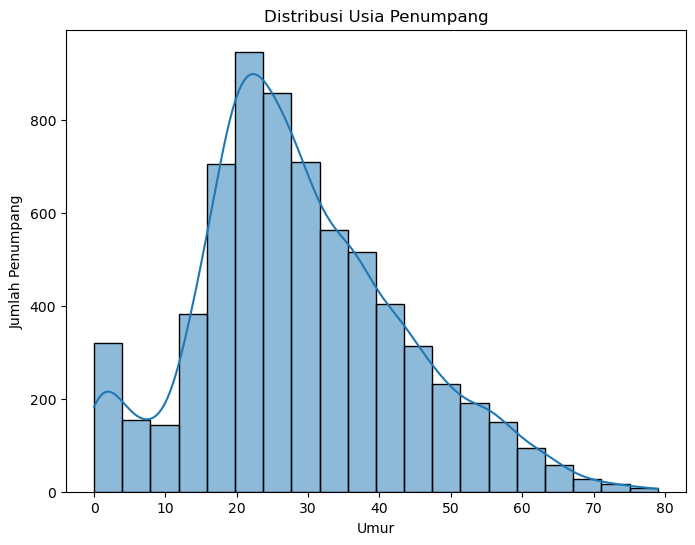

In [10]:
# 1. Distribusi Usia Penumpang (Umur)
# Menampilkan statistik deskriptif
print(df_train['Umur'].describe())

# Visualisasi histogram
plt.figure(figsize=(8, 6))
sb.histplot(df_train['Umur'], bins=20, kde=True)
plt.xlabel('Umur')
plt.ylabel('Jumlah Penumpang')
plt.title('Distribusi Usia Penumpang')
plt.show()

- Kesimpulan : Dari visualisasi diatas menunjukkan distribusi usia penumpang yang ada di sekitar 20-30 tahun lebih banyak daripada usia lainnya.

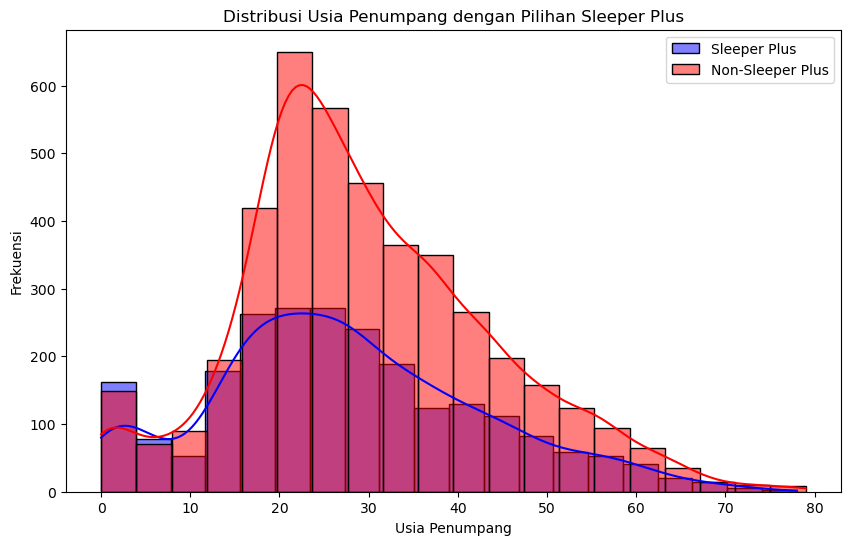

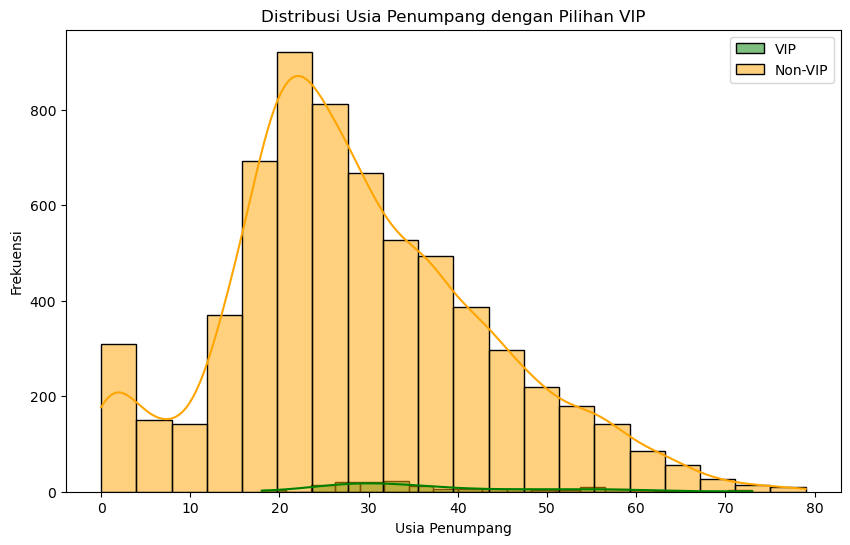

In [11]:
# 2. Hubungan antara Usia Penumpang dan Pilihan Opsi Sleeper Plus (Sleeper_Plus) serta Opsi VIP (VIP)
# Membuat histogram untuk penumpang Sleeper Plus
plt.figure(figsize=(10, 6))
sb.histplot(df_train[df_train['Sleeper_Plus'] == 1]['Umur'], bins=20, kde=True, label='Sleeper Plus', color='blue')
sb.histplot(df_train[df_train['Sleeper_Plus'] == 0]['Umur'], bins=20, kde=True, label='Non-Sleeper Plus', color='red')
plt.xlabel('Usia Penumpang')
plt.ylabel('Frekuensi')
plt.title('Distribusi Usia Penumpang dengan Pilihan Sleeper Plus')
plt.legend()
plt.show()

# Membuat histogram untuk penumpang VIP
plt.figure(figsize=(10, 6))
sb.histplot(df_train[df_train['VIP'] == 1]['Umur'], bins=20, kde=True, label='VIP', color='green')
sb.histplot(df_train[df_train['VIP'] == 0]['Umur'], bins=20, kde=True, label='Non-VIP', color='orange')
plt.xlabel('Usia Penumpang')
plt.ylabel('Frekuensi')
plt.title('Distribusi Usia Penumpang dengan Pilihan VIP')
plt.legend()
plt.show()

- Kesimpulan : 
1. Pengguna Non-Sleeper Plus terbanyak berasal dari kalangan Umur 20 tahun-an
2. Kebanyakan penumpang adalah Non-VIP dengan umur 20 tahun-an

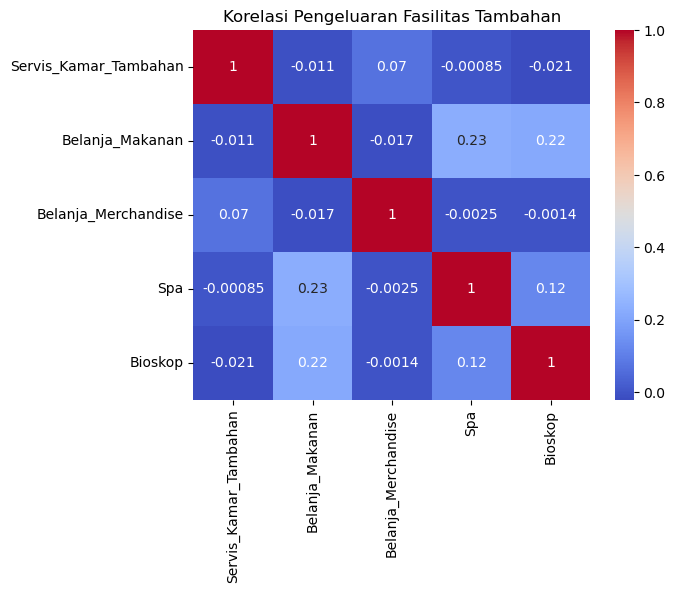

In [12]:
# 3. Hubungan/Korelasi antara Pengeluaran untuk Fasilitas Tambahan
# Menghitung korelasi antara variabel pengeluaran
correlation = df_train[['Servis_Kamar_Tambahan', 'Belanja_Makanan', 'Belanja_Merchandise', 'Spa', 'Bioskop']].corr()
sb.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi Pengeluaran Fasilitas Tambahan')
plt.show()

- Kesimpulan : Heatmap ini menunjukkan sejauh mana pengeluaran untuk berbagai fasilitas tambahan berkorelasi satu sama lain. 

Korelasi Positif : yang dimana orang akan memungkinkan untuk melakukan itu lebih besar daripada korelasi negatif yang ada dalam diagram heatmap.
   - Spa X Belanja_Makanan (paling sering dilakukan karena memiliki nilai yang sangat tinggi)
   - Bioskop X Belanja_Makanan
   - Servis Kamar Tambahan X Belanja Merchandise
   - Spa X Bioskop

Selain itu adalah korelasi negatif : yang dimana potensi orang akan melakukan kegiatan ini sangatlah kecil.
   - Spa X Servis_Kamar_Tambahan (paling tidak mungkin dilakukan karena memiliki nilai paling kecil)
   - Bioskop X Sevis_Kamar_Tambahan
   - Spa X Belanja Merchandise 
   - Bioskop X Belanja Merchandise
   - Belanja Makanan X Servis_Kamar_Tambahan
   - Belanja Merchandise X Belanja Makanan

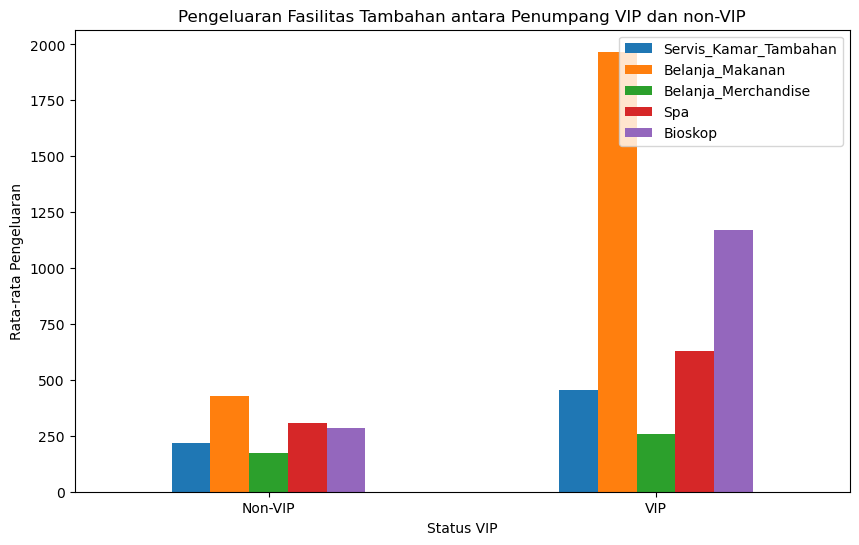

In [13]:
# 4. Bandingkan Pengeluaran Fasilitas Tambahan antara Penumpang VIP dan non-VIP
# Mengelompokkan data berdasarkan status VIP
grouped = df_train.groupby('VIP')[['Servis_Kamar_Tambahan', 'Belanja_Makanan', 'Belanja_Merchandise', 'Spa', 'Bioskop']].mean()
grouped.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Status VIP')
plt.ylabel('Rata-rata Pengeluaran')
plt.title('Pengeluaran Fasilitas Tambahan antara Penumpang VIP dan non-VIP')
plt.xticks([0, 1], ['Non-VIP', 'VIP'], rotation=0)
plt.legend(loc='upper right')
plt.show()

- Kesimpulan : Penumpang VIP cenderung memiliki pengeluaran yang lebih tinggi untuk semua fasilitas tambahan dibandingkan dengan penumpang non-VIP.

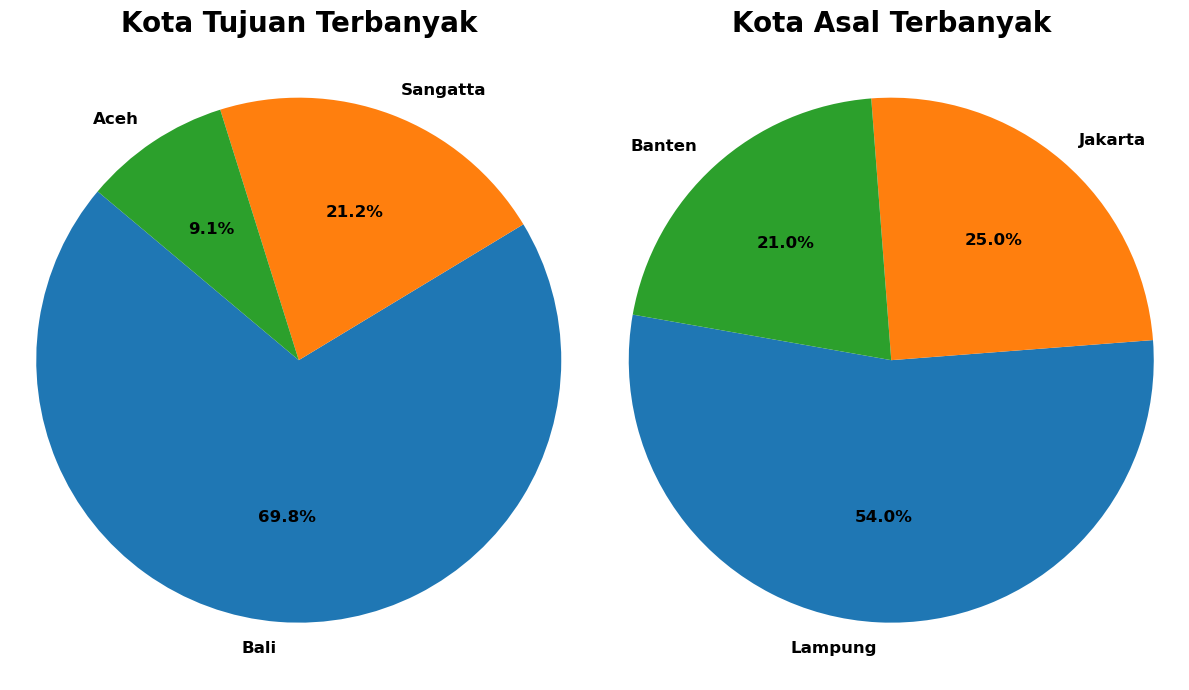

In [14]:
# 5. Kota Tujuan dan Asal Penumpang
# Menghitung jumlah penumpang untuk masing-masing kota tujuan dan asal
dest_counts = df_train['Tujuan'].value_counts()
origin_counts = df_train['Asal'].value_counts()

# Visualisasi sebagai pie chart
plt.figure(figsize=(12, 7))

# Pie chart untuk kota tujuan
plt.subplot(1, 2, 1)
_, texts, autotexts = plt.pie(dest_counts, labels=dest_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16})
plt.axis('equal')  # Mengatur aspek menjadi equal
plt.title('Kota Tujuan Terbanyak', size=20, weight='bold')
for text, autotext in zip(texts, autotexts):
    text.set(size=12, weight='bold')
    autotext.set(size=12, weight='bold')

# Pie chart untuk kota asal
plt.subplot(1, 2, 2)
_, texts, autotexts = plt.pie(origin_counts, labels=origin_counts.index, autopct='%1.1f%%', startangle=170, textprops={'fontsize': 16})
plt.axis('equal')  # Mengatur aspek menjadi equal
plt.title('Kota Asal Terbanyak', size=20, weight='bold')
for text, autotext in zip(texts, autotexts):
    text.set(size=12, weight='bold')
    autotext.set(size=12, weight='bold')

plt.tight_layout()
plt.show()

- Kesimpulan : Kota Bali menjadi kota destinasi yang paling banyak diminati oleh penumpang dan Penumpang dari Asal Lampung paling banyak menaiki kapal ini.

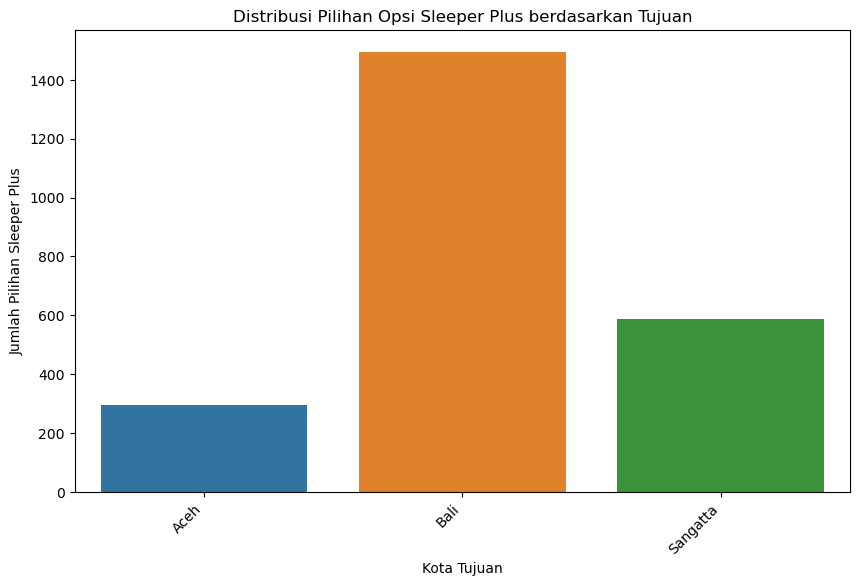

In [15]:
# 6. Distribusi Pilihan Opsi Sleeper Plus berdasarkan Tujuan
# Menghitung jumlah pemilihan opsi Sleeper Plus berdasarkan tujuan
sleeper_plus_by_destination = df_train.groupby('Tujuan')['Sleeper_Plus'].sum().reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
sb.barplot(data=sleeper_plus_by_destination, x='Tujuan', y='Sleeper_Plus')
plt.xlabel('Kota Tujuan')
plt.ylabel('Jumlah Pilihan Sleeper Plus')
plt.title('Distribusi Pilihan Opsi Sleeper Plus berdasarkan Tujuan')
plt.xticks(rotation=45, ha='right')
plt.show()

- Kesimpulan : Penumpang dengan tujuan ke Bali paling banyak memilih opsi sleeper_plus dibandingkan penumpang dengan tujuan ke sangatta dan aceh.

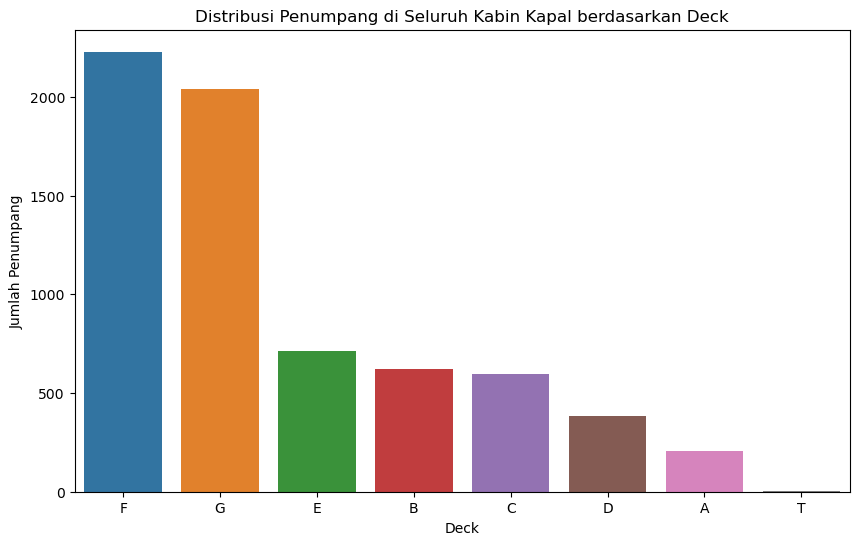

In [16]:
# 7. Distribusi Penumpang di Seluruh Kabin Kapal berdasarkan Deck
# Menganalisis data kabin dan mendapatkan deck dari nomor kabin
df_train['Deck'] = df_train['Kabin'].str.extract(r'([A-Z])')

# Menghitung jumlah penumpang di setiap deck
passengers_by_deck = df_train['Deck'].value_counts()

# Visualisasi
plt.figure(figsize=(10, 6))
sb.barplot(x=passengers_by_deck.index, y=passengers_by_deck.values)
plt.xlabel('Deck')
plt.ylabel('Jumlah Penumpang')
plt.title('Distribusi Penumpang di Seluruh Kabin Kapal berdasarkan Deck')
plt.show()

- Kesimpulan: Deck yang paling penuh adalah deck 'F', sedangkan Dek yang paling kosong adalah deck 'T'

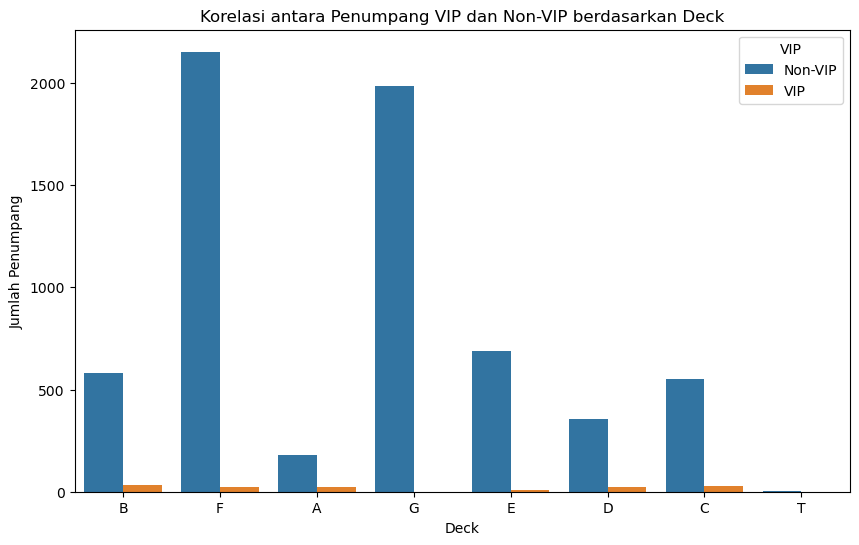

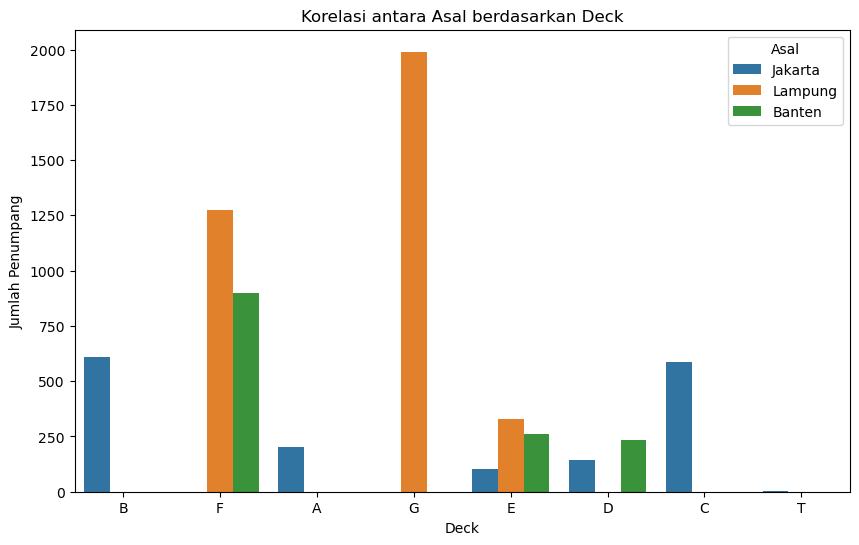

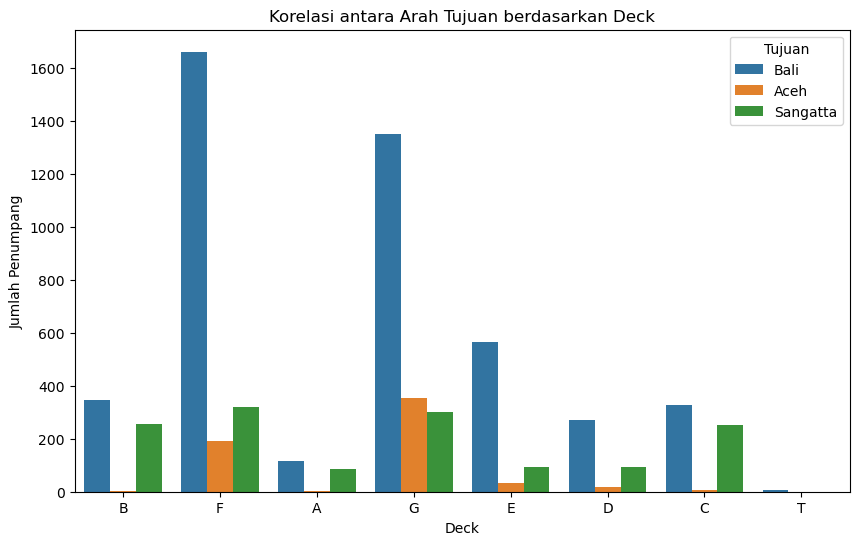

In [17]:
# Menggabungkan data untuk semua deck
df_filtered = df_train[(df_train['Deck'] == 'F') | (df_train['Deck'] == 'G') | (df_train['Deck'] == 'E') | (df_train['Deck'] == 'B') | (df_train['Deck'] == 'C') | (df_train['Deck'] == 'D') | (df_train['Deck'] == 'A') | (df_train['Deck'] == 'T')]

# Visualisasi korelasi antara penumpang VIP dan non-VIP serta arah tujuan
plt.figure(figsize=(10, 6))
sb.countplot(data=df_filtered, x='Deck', hue='VIP')
plt.xlabel('Deck')
plt.ylabel('Jumlah Penumpang')
plt.title('Korelasi antara Penumpang VIP dan Non-VIP berdasarkan Deck')
plt.legend(title='VIP', labels=['Non-VIP', 'VIP'])
plt.show()

plt.figure(figsize=(10, 6))
sb.countplot(data=df_filtered, x='Deck', hue='Asal')
plt.xlabel('Deck')
plt.ylabel('Jumlah Penumpang')
plt.title('Korelasi antara Asal berdasarkan Deck')
plt.legend(title='Asal')
plt.show()

plt.figure(figsize=(10, 6))
sb.countplot(data=df_filtered, x='Deck', hue='Tujuan')
plt.xlabel('Deck')
plt.ylabel('Jumlah Penumpang')
plt.title('Korelasi antara Arah Tujuan berdasarkan Deck')
plt.legend(title='Tujuan')
plt.show()

- Kesimpulan:
    - Deck 'G' dan 'T' hanya berisi penumpang 'NonVIP'
    - Deck 'G' hanya berisi penumpang dengan asal 'Lampung'
    - Deck 'F' dan 'G' berisi penumpang dengan tujuan ke Bali, Aceh, dan Sangatta, maka dari itu Deck 'F' dan 'G' menjadi deck yang paling penuh dibandingkan deck lainnya. 

In [18]:
# Menerapkan hal yang sama untuk data di test

# 7. Distribusi Penumpang di Seluruh Kabin Kapal berdasarkan Deck
# Menganalisis data kabin dan mendapatkan deck dari nomor kabin
df_test['Deck'] = df_test['Kabin'].str.extract(r'([A-Z])')

# Menghitung jumlah penumpang di setiap deck
passengers_by_deck = df_test['Deck'].value_counts()

In [19]:
# Menggabungkan data untuk semua deck
df_filtered = df_test[(df_test['Deck'] == 'F') | (df_test['Deck'] == 'G') | (df_test['Deck'] == 'E') | (df_test['Deck'] == 'B') | (df_test['Deck'] == 'C') | (df_test['Deck'] == 'D') | (df_test['Deck'] == 'A') | (df_test['Deck'] == 'T')]

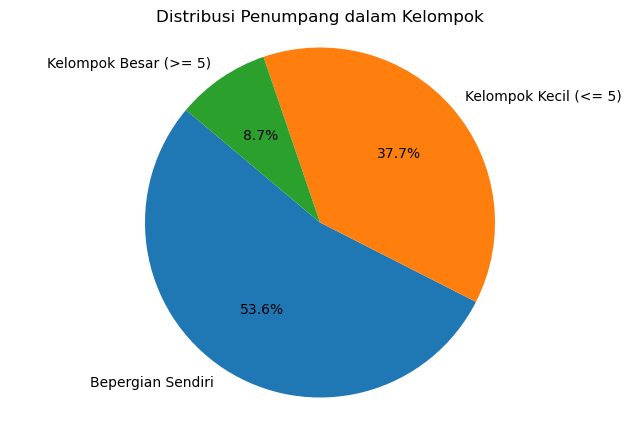

In [20]:
# 8. Distribusi Jenis Perjalanan Penumpang

# Membuat kolom baru 'Kelompok' berdasarkan penumpang_id
df_train['Kelompok'] = df_train['Penumpang_id'].str.extract(r'(\d{4})_')

# Menghitung jumlah anggota dalam setiap kelompok
group_sizes = df_train['Kelompok'].value_counts()

small_groups = group_sizes[group_sizes == 1].sum()
medium_groups = group_sizes[(group_sizes > 1) & (group_sizes <= 5)].sum()
large_groups = group_sizes[group_sizes >= 5].sum()

group_labels = ['Bepergian Sendiri', 'Kelompok Kecil (<= 5)', 'Kelompok Besar (>= 5)']
group_sizes = [small_groups, medium_groups, large_groups]

plt.figure(figsize=(8, 5))
plt.pie(group_sizes, labels=group_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Penumpang dalam Kelompok')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- Kesimpulan : Penumpang lebih sering bepergian sendiri dibandingkan berkelompok besar.

In [21]:
# Melakukan hal yang sama untuk data test

# Membuat kolom baru 'Kelompok' berdasarkan penumpang_id
df_test['Kelompok'] = df_test['Penumpang_id'].str.extract(r'(\d{4})_')

# Menghitung jumlah anggota dalam setiap kelompok
group_sizes = df_test['Kelompok'].value_counts()

small_groups = group_sizes[group_sizes == 1].sum()
medium_groups = group_sizes[(group_sizes > 1) & (group_sizes <= 5)].sum()
large_groups = group_sizes[group_sizes >= 5].sum()

group_labels = ['Bepergian Sendiri', 'Kelompok Kecil (<= 5)', 'Kelompok Besar (>= 5)']
group_sizes = [small_groups, medium_groups, large_groups]

### 3. Pre-processing Data

#### Missing Value

In [22]:
print('Missing Values in Dataset "train.csv"')
df_train.isnull().sum()

Missing Values in Dataset "train.csv"


Penumpang_id               0
Asal                     161
Sleeper_Plus             171
Kabin                    162
Tujuan                   150
Umur                     154
VIP                      158
Servis_Kamar_Tambahan    150
Belanja_Makanan          153
Belanja_Merchandise      168
Spa                      146
Bioskop                  162
Nama                     165
Tiba_Ditujuan              0
Deck                     162
Kelompok                   0
dtype: int64

In [23]:
print('Missing Values in Dataset "test.csv"')
df_test.isnull().sum()

Missing Values in Dataset "test.csv"


Penumpang_id              0
Asal                     40
Sleeper_Plus             46
Kabin                    37
Tujuan                   32
Umur                     25
VIP                      45
Servis_Kamar_Tambahan    31
Belanja_Makanan          30
Belanja_Merchandise      40
Spa                      37
Bioskop                  26
Nama                     35
Deck                     37
Kelompok                  0
dtype: int64

Kita menggunakan isnull().sum() untuk melihat jumlah nilai yang hilang (missing values) dalam dataset "train.csv" dan "test.csv". Ini membantu kita mengidentifikasi kolom mana yang memiliki data yang hilang.

#### Handling Missing Values

- Membuat daftar kolom-kolom yang mengandung missing values, seperti 'Belanja_Makanan', 'Spa', 'Belanja_Merchandise', 'Servis_Kamar_Tambahan', 'Bioskop', 'Kabin', 'Sleeper_Plus', 'VIP', 'Asal', 'Tujuan', dan 'Umur'.

In [24]:
print(df_train.columns.values)
print('------'*6)
print(df_train['Asal'].value_counts())
print('------'*6)
print(df_train['Tujuan'].value_counts())
print('------'*6)
print(df_train['VIP'].value_counts())
print('------'*6)
print(df_train['Tiba_Ditujuan'].value_counts())
print('------'*6)
print(df_train['Kabin'].str[0].value_counts())
print('------'*6)
print(df_train['Sleeper_Plus'].value_counts())
print('------'*6)
print(df_train['Umur'].value_counts())

['Penumpang_id' 'Asal' 'Sleeper_Plus' 'Kabin' 'Tujuan' 'Umur' 'VIP'
 'Servis_Kamar_Tambahan' 'Belanja_Makanan' 'Belanja_Merchandise' 'Spa'
 'Bioskop' 'Nama' 'Tiba_Ditujuan' 'Deck' 'Kelompok']
------------------------------------
Lampung    3668
Jakarta    1698
Banten     1427
Name: Asal, dtype: int64
------------------------------------
Bali        4747
Sangatta    1441
Aceh         616
Name: Tujuan, dtype: int64
------------------------------------
False    6650
True      146
Name: VIP, dtype: int64
------------------------------------
True     3550
False    3404
Name: Tiba_Ditujuan, dtype: int64
------------------------------------
F    2229
G    2039
E     711
B     620
C     595
D     385
A     208
T       5
Name: Kabin, dtype: int64
------------------------------------
False    4365
True     2418
Name: Sleeper_Plus, dtype: int64
------------------------------------
24.0    253
21.0    249
23.0    236
22.0    235
18.0    232
       ... 
78.0      3
79.0      3
72.0      3
77.0     

- Kemudian mengisi missing values pada kolom 'Umur' dengan nilai rata-rata (mean) yang ada dari kolom tersebut, dan mengisi missing values pada kolom-kolom lain dengan nilai yang paling sering muncul (mode) dalam kolom tersebut.

In [25]:
# Handling Missing Values
Missing_features = ['Belanja_Makanan',
                    'Spa',
                    'Belanja_Merchandise',
                    'Servis_Kamar_Tambahan',
                    'Bioskop',
                    'Kabin',
                   'Sleeper_Plus',
                   'VIP',
                   'Asal',
                   'Tujuan',
                   'Umur']
for feature in Missing_features:
    if feature=='Umur':
        fill = df_train[feature].mean()
    else:
        fill = df_train[feature].value_counts().index[0]
    df_train[feature] = df_train[feature].fillna(fill)
    df_test[feature] = df_test[feature].fillna(fill)

- Melakukan analisis lebih lanjut terhadap kolom 'Kabin' dengan cara membagi kabin menjadi tiga kolom baru: 'Deck', 'Num', dan 'Side'.
- Kolom 'Deck' berisi informasi dek kabin (diperoleh dari bagian pertama dalam nomor kabin).
- Kolom 'Num' berisi nomor kabin (diperoleh dari bagian kedua dalam nomor kabin).
- Kolom 'Side' berisi informasi sisi kabin (diperoleh dari bagian ketiga dalam nomor kabin).

In [26]:
# Divide and Analyze 'Kabin'
def extract_deck(s):
    return s.split('/')[0]

def extract_num(s):
    return s.split('/')[1]

def extract_side(s):
    return s.split('/')[2]

df_train['Deck'] = df_train['Kabin'].apply(extract_deck)
df_train['Num'] = df_train['Kabin'].apply(extract_num)
df_train['Side'] = df_train['Kabin'].apply(extract_side)

df_test['Deck'] = df_test['Kabin'].apply(extract_deck)
df_test['Num'] = df_test['Kabin'].apply(extract_num)
df_test['Side'] = df_test['Kabin'].apply(extract_side)

- Mengonversi fitur-fitur kategoris seperti 'Asal', 'Tujuan', 'Deck', dan 'Side' menjadi variabel numerik dengan menggunakan one-hot encoding. Hal ini dilakukan agar Asal, Tujuan, Deck, dan Side menjadi lebih rinci.

In [27]:
# Penerapan One-Hot Encoding untuk Asal, Tujuan, Deck, dan Side
features_cat = ['Asal', 'Tujuan', 'Deck', 'Side']
for feature in features_cat:
    df_train[pd.get_dummies(df_train[feature], prefix=feature).columns] = pd.get_dummies(df_train[feature], prefix=feature)
    df_test[pd.get_dummies(df_test[feature], prefix=feature).columns] = pd.get_dummies(df_test[feature], prefix=feature)

In [28]:
# Menggabungkan kolom-kolom yang ada di dataframe train dan dataframe test sehingga tercipta dataframe yang baru. Hal ini dilakukan agar kita bisa mengetahui isi dari kedua dataframe tersebut.
data = pd.concat([df_train[df_test.columns], df_test])
data

,Penumpang_id,Asal,Sleeper_Plus,Kabin,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,...,Tujuan_Sangatta,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Side_P,Side_S
0,0001_01,Jakarta,False,B/0/P,Bali,39.0,False,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,0002_01,Lampung,False,F/0/S,Bali,24.0,False,109.0,9.0,25.0,...,0,0,0,0,0,0,1,0,0,1
2,0003_01,Jakarta,False,A/0/S,Bali,58.0,True,43.0,3576.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,0003_02,Jakarta,False,A/0/S,Bali,33.0,False,0.0,1283.0,371.0,...,0,1,0,0,0,0,0,0,0,1
4,0004_01,Lampung,False,F/1/S,Bali,16.0,False,303.0,70.0,151.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,9276_01,Jakarta,False,A/98/P,Sangatta,41.0,True,0.0,6819.0,0.0,...,1,1,0,0,0,0,0,0,1,0
1735,9278_01,Lampung,True,G/1499/S,Aceh,18.0,False,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
1736,9279_01,Lampung,False,G/1500/S,Bali,26.0,False,0.0,0.0,1872.0,...,0,0,0,0,0,0,0,1,0,1
1737,9280_01,Jakarta,False,E/608/S,Sangatta,32.0,False,0.0,1049.0,0.0,...,1,0,0,0,0,1,0,0,0,1


- Membuat kolom baru 'Age_Group' yang mengelompokkan penumpang berdasarkan umur mereka. Setiap kelompok umur diberi label numerik. Proses ini memudahkan model dalam memahami hubungan umur terhadap variabel target.

In [29]:
# Handling Age
def age_group(s):
    if s == 0:
        return -1
    elif (s > 0) & (s <= 11):
        return 1
    elif (s > 11) & (s <= 22):
        return 2
    elif (s > 22) & (s <= 33):
        return 3
    elif (s > 33) & (s <= 45):
        return 4
    elif (s > 45) & (s <= 56):
        return 5
    elif (s > 56) & (s <= 67):
        return 6
    elif (s > 67) & (s <= 79):
        return 7
    elif (s > 79) & (s <= 80):
        return 8
    
df_train['Age_Group'] = df_train['Umur'].apply(age_group)
df_test['Age_Group'] = df_test['Umur'].apply(age_group)

- Membuat kolom baru 'Total_Pengeluaran' yang menghitung total pengeluaran penumpang untuk semua fasilitas tambahan (Servis_Kamar_Tambahan, Belanja_Makanan, Belanja_Merchandise, Spa, Bioskop). Ini dapat memberikan wawasan tambahan mengenai kebiasaan pengeluaran penumpang.

In [30]:
df_train['Total_Pengeluaran'] = df_train['Servis_Kamar_Tambahan'] + df_train['Belanja_Makanan'] + df_train['Belanja_Merchandise'] + df_train['Spa'] + df_train['Bioskop']
df_test['Total_Pengeluaran'] = df_test['Servis_Kamar_Tambahan'] + df_test['Belanja_Makanan'] + df_test['Belanja_Merchandise'] + df_test['Spa'] + df_test['Bioskop']

- Menghapus kolom-kolom yang tidak akan digunakan dalam pemodelan, seperti 'Penumpang_id', 'Asal', 'Kabin', 'Tujuan', 'Nama', 'Umur', 'Deck', dan 'Side'. Namun, menggantinya dengan data yang sudah di one hot encoding di awal. Jadi data yang akan keluar nantinya bukan Asal saja tetapi akan menjelaskan Asal_Banten pada hasil akhirnya.

In [31]:
# Drop Kolom "train.csv"
df_train.drop(['Penumpang_id','Asal','Kabin','Tujuan','Nama','Umur','Deck','Side'], axis = 1, inplace = True)

In [32]:
# Drop Kolom "test.csv"
df_test.drop(['Penumpang_id','Asal','Kabin','Tujuan','Nama','Umur','Deck','Side'], axis = 1, inplace = True)

- Mengonversi kolom 'Sleeper_Plus', 'VIP', dan 'Num' menjadi tipe data integer untuk memastikan konsistensi tipe data dalam dataset.

In [33]:
df_train['Sleeper_Plus'] = df_train['Sleeper_Plus'].astype(int)
df_train['VIP'] = df_train['VIP'].astype(int)
df_train['Num'] = df_train['VIP'].astype(int)
df_test['Sleeper_Plus'] = df_test['Sleeper_Plus'].astype(int)
df_test['VIP'] = df_test['VIP'].astype(int)
df_test['Num'] = df_test['VIP'].astype(int)

- Memisahkan data latih (training data) menjadi dua bagian: x_train yang berisi semua fitur kecuali 'Tiba_Ditujuan' (variabel target), dan y_train yang berisi variabel target 'Tiba_Ditujuan'.

In [34]:
x_train = df_train.drop(['Tiba_Ditujuan'], axis=1)
y_train = df_train['Tiba_Ditujuan']
x_test = df_test

- Menguji (test data) dalam x_test yang akan digunakan untuk prediksi.

In [35]:
x_test.shape , x_train.shape

((1739, 26), (6954, 27))

- Menggunakan .isnull().sum() untuk memeriksa jumlah nilai null (missing values) di dalam dataset "train.csv" setelah selesai tahap pre-processing.

In [36]:
df_train.isnull().sum()

Sleeper_Plus             0
VIP                      0
Servis_Kamar_Tambahan    0
Belanja_Makanan          0
Belanja_Merchandise      0
Spa                      0
Bioskop                  0
Tiba_Ditujuan            0
Kelompok                 0
Num                      0
Asal_Banten              0
Asal_Jakarta             0
Asal_Lampung             0
Tujuan_Aceh              0
Tujuan_Bali              0
Tujuan_Sangatta          0
Deck_A                   0
Deck_B                   0
Deck_C                   0
Deck_D                   0
Deck_E                   0
Deck_F                   0
Deck_G                   0
Deck_T                   0
Side_P                   0
Side_S                   0
Age_Group                0
Total_Pengeluaran        0
dtype: int64

- Membuat kolom baru dalam data uji (df_test) yang disebut 'Deck_T' dengan semua nilai diisi oleh 0.
- Kolom ini dibuat untuk memastikan bahwa data train sama dengan data yang ada di test, sehingga model yang dilatih dapat memprediksi data dengan benar.
- Menyusun ulang kolom 'Deck_T' yang baru dibuat dan memasukkannya sebelum kolom 'Side_P' dalam data. Dilakukan seperti itu agar susunan kolom antara data train dan juga data test sama.

In [37]:
# Create a new DataFrame with a single column 'Deck_T' filled with default values
new_column = pd.DataFrame({'Deck_T': [0] * len(df_test)})

# Insert the new column in the desired position (before 'Side_P' column)
column_position = df_test.columns.get_loc('Side_P')
df_test = pd.concat([df_test.iloc[:, :column_position], new_column, df_test.iloc[:, column_position:]], axis=1)

df_test.isnull().sum()

Sleeper_Plus             0
VIP                      0
Servis_Kamar_Tambahan    0
Belanja_Makanan          0
Belanja_Merchandise      0
Spa                      0
Bioskop                  0
Kelompok                 0
Num                      0
Asal_Banten              0
Asal_Jakarta             0
Asal_Lampung             0
Tujuan_Aceh              0
Tujuan_Bali              0
Tujuan_Sangatta          0
Deck_A                   0
Deck_B                   0
Deck_C                   0
Deck_D                   0
Deck_E                   0
Deck_F                   0
Deck_G                   0
Deck_T                   0
Side_P                   0
Side_S                   0
Age_Group                0
Total_Pengeluaran        0
dtype: int64

In [38]:
df_train.head(10)

,Sleeper_Plus,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Tiba_Ditujuan,Kelompok,Num,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,Age_Group,Total_Pengeluaran
0,0,0,0.0,0.0,0.0,0.0,0.0,False,0001,0,...,0,0,0,0,0,0,1,0,4,0.0
1,0,0,109.0,9.0,25.0,549.0,44.0,True,0002,0,...,0,0,0,1,0,0,0,1,3,736.0
2,0,1,43.0,3576.0,0.0,6715.0,49.0,False,0003,1,...,0,0,0,0,0,0,0,1,6,10383.0
3,0,0,0.0,1283.0,371.0,3329.0,193.0,False,0003,0,...,0,0,0,0,0,0,0,1,3,5176.0
4,0,0,303.0,70.0,151.0,565.0,2.0,True,0004,0,...,0,0,0,1,0,0,0,1,2,1091.0
5,0,0,0.0,483.0,0.0,291.0,0.0,True,0005,0,...,0,0,0,1,0,0,1,0,4,774.0
6,0,0,42.0,1539.0,3.0,0.0,0.0,True,0006,0,...,0,0,0,1,0,0,0,1,3,1584.0
7,1,0,0.0,0.0,0.0,0.0,0.0,True,0006,0,...,0,0,0,0,1,0,0,1,3,0.0
8,0,0,0.0,785.0,17.0,216.0,0.0,True,0007,0,...,0,0,0,1,0,0,0,1,4,1018.0
9,1,0,0.0,0.0,0.0,0.0,0.0,True,0008,0,...,0,0,0,0,0,0,1,0,2,0.0


In [39]:
df_test.head(10)

,Sleeper_Plus,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Kelompok,Num,Asal_Banten,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,Age_Group,Total_Pengeluaran
0,1,0,0.0,0.0,0.0,0.0,0.0,7388,0,0,...,0,0,0,0,1,0,0,1,2,0.0
1,0,0,240.0,0.0,0.0,586.0,10.0,7390,0,0,...,0,0,0,0,1,0,1,0,6,836.0
2,1,0,0.0,0.0,0.0,0.0,0.0,7391,0,0,...,0,0,0,0,1,0,1,0,3,0.0
3,1,0,0.0,0.0,0.0,0.0,0.0,7392,0,0,...,0,0,0,0,1,0,1,0,4,0.0
4,0,0,0.0,0.0,0.0,7.0,782.0,7393,0,0,...,0,0,1,0,0,0,1,0,4,789.0
5,0,0,0.0,653.0,21.0,0.0,0.0,7394,0,0,...,0,0,0,0,1,0,1,0,3,674.0
6,1,0,0.0,0.0,0.0,0.0,0.0,7395,0,0,...,0,0,0,0,0,0,0,1,2,0.0
7,1,0,0.0,0.0,0.0,0.0,0.0,7395,0,0,...,0,0,0,0,0,0,0,1,5,0.0
8,0,0,4.0,5974.0,0.0,3682.0,197.0,7395,0,0,...,0,0,0,0,0,0,0,1,4,9857.0
9,0,1,0.0,486.0,0.0,0.0,2470.0,7395,1,0,...,0,0,0,0,0,0,0,1,4,2956.0


#### Apply Models

In [40]:
# Masukan train data yang sudah di-preprocessing di variable df_train
df_train = df_train

# Masukan test data yang sudah di-preprocessing di variable df_test
df_test = df_test

# Masukan lokasi file test data anda
file_test = '../Modul 3/test.csv'

In [41]:
X = df_train.drop(columns=['Tiba_Ditujuan'])
y = df_train['Tiba_Ditujuan']

In [42]:
# Mengimpor library yang diperlukan
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model RandomForestClassifier
rf = RandomForestClassifier()

# Menentukan hyperparameters yang ingin diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Melatih model dengan data latih
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [43]:
y_result = grid_search.predict(df_test)

In [44]:
df_test_id = pd.read_csv(file_test)

df_submission = pd.DataFrame({'Penumpang_id': df_test_id['Penumpang_id']})
df_submission['Tiba_Ditujuan'] = y_result

In [45]:
df_submission.to_csv('submission.csv', index=False)